# Manipulación de Datos en Python
## Proyecto final

### Parte 2
#### Realizar una ingesta de datos de un archivo formato .csv utilizando la librería de Pandas.

El conjunto de datos utilizado es __[Predicción de Insuficiencia Cardíaca](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)__: *11 características clínicas para predecir eventos de enfermedad cardíaca*.
Siguiendo el enlace se puede leer la descripción detallada sobre la obtención de los datos y de cada parámetro relevado.

<div class="alert alert-block alert-info"> Revisado por última vez el 02/09/23 a las 19:00hs. </div>

Mi objetivo de esta parte del trabajo es, además de la ingesta de datos, una limpieza de los mismos y un posterior filtrado (en caso de necesitarlo); pensando en la funcionalidad necesaria para realizar la [Parte 3](Parte-3).

In [17]:
# Importación de librerías y del conjunto de datos (data set)

import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/Burbu/Documents/AP/Proyecto_final/Parte_2/heart.csv", sep = ",")

In [18]:
# Control de la importación como estructura de datos (data frame)

type(df)

pandas.core.frame.DataFrame

In [19]:
# Primer vistazo del conjunto de datos

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
# Información visual sobre el formato y el orden del conjunto de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
# Revisión de cantidad de datos vacíos

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [22]:
# Muestra estadística de los datos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [23]:
# Conversión de datos de tipo string a tipo int para su posterior análisis

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])

In [24]:
# Revisión de la conversión hecha

df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


### Parte 3
#### Mencioná y explicá brevemente un caso de éxito de aplicación de *Machine Learning* en la empresa.

A partir del conjunto de datos obtenido al final de la [Parte 2](#Parte-2), me propuse crear de un algoritmo que pudiera predecir la influencia que tienen distintas características clínicas en la posibilidad de tener una *insuficiencia cardíaca*.

Aquí se mostrará el código resultante y utilizado para la confección del análisis que se encuentra __[aquí](https://drive.google.com/drive/folders/1AFhZBxo2mhiRv4wN9Nf3Lo-d3d69JDSv?usp=drive_link)__ bajo el título *Parte_3*.

<div class="alert alert-block alert-warning"> Para la selección del método utilizado, y por ende, obtener conclusiones coherentes, múltiples pruebas han sido ejecutadas. Por cuestiones de legilibidad y optimización de este documento, solo he incluido la prueba final, que es la más favorable y la utilizada en el análisis realizado en esta última parte del proyecto. </div>

<Axes: >

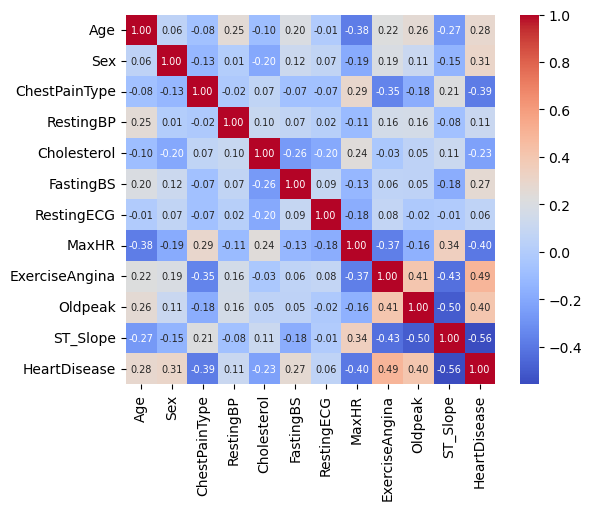

In [25]:
# Graficación de la correlación existente entre los datos

import seaborn as sns

sns.heatmap(df.corr(), cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 7}, cmap = 'coolwarm')

In [26]:
# Separación de datos para entrenamiento y evaluación

from sklearn.model_selection import train_test_split

x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=14)

In [27]:
# Selección y entrenamiento del modelo

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=14)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=14)

In [28]:
# Predicciones y resultados

y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [29]:
# Cálculo de la precisión del modelo

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_train_pred)
print(f'Tasa de éxito en el conjunto de entrenamiento: {accuracy:.2f}')
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Tasa de éxito en el conjunto de evaluación: {accuracy:.2f}')

Tasa de éxito en el conjunto de entrenamiento: 1.00
Tasa de éxito en el conjunto de evaluación: 0.75


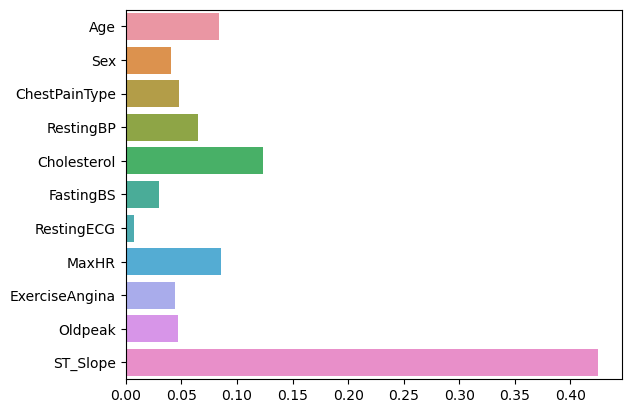

In [30]:
# Graficación de la inferencia que cada característica tiene sobre la predicción que genera el modelo empleado

import matplotlib.pyplot as plt

importances = tree.feature_importances_
columns = x.columns
sns.barplot(y = columns, x = importances)
plt.show()